# Excercise 1: Error estimates
## Solution given by H. Kobayashi and H. Vargas

In [4]:
# import external libraries and Matplotlib inline
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

### Data set
Exercise 1. 1 and 2 Generating N data sets and drawing the histgram of this

In [5]:
# Function used to generate correlated and uncorrelated data set (SOLUTION 1.1)
def generatingDataSets(N, t_exp):
    rho = numpy.exp(-1./t_exp)

    mu, sigma = 0, 1
    x = mu + sigma * numpy.random.randn(N)

    e_i  = []
    e_i.append(x[0])
    for i in range(1, N):
        e_i.append(rho*e_i[i - 1] + numpy.sqrt(1. - rho**2)*x[i])
        
    return e_i

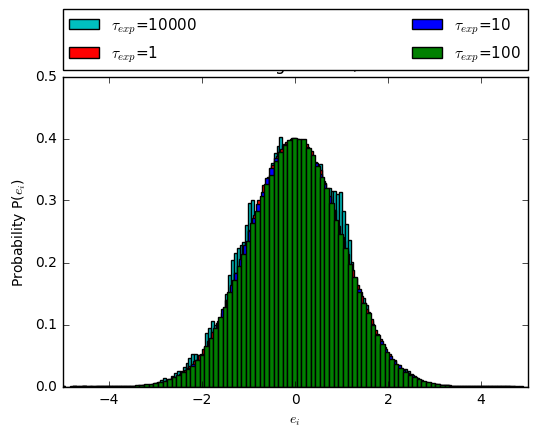

In [17]:
# Creating N data sets and drawing the histogram of this (SOLUTION 1.2)
N = 1000000
error_t1   = generatingDataSets(N, 1)
error_t10  = generatingDataSets(N, 10)
error_t100 = generatingDataSets(N, 100)
error_t10000 = generatingDataSets(N, 10000)

# the histogram of the data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(error_t10000, bins=100, normed=1, color='c',label=r'$ \tau_{exp}$=10000')
ax.hist(error_t1, bins=100, normed=1, color='r',label=r'$ \tau_{exp}$=1')
ax.hist(error_t10, bins=100, normed=1, color='b',label=r'$ \tau_{exp}$=10')
ax.hist(error_t100, bins=100, normed=1, color='g',label=r'$ \tau_{exp}$=100')
ax.set_title('Histogram of $e_{i}$')
ax.set_xlabel(r'$e_{i}$')
ax.set_ylabel(r'Probability P($e_{i}$)')
ax.set_xlim(-5, 5)
ax.set_ylim(0,0.5)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102),borderaxespad=0.,ncol=2, mode="expand",loc='lower right',prop={'size':11})
fig.show()

#### Bonus exercise
Plot 1%($10^4$ mesurements) of two data sets at $\tau_{exp} = 10$ and $100$.

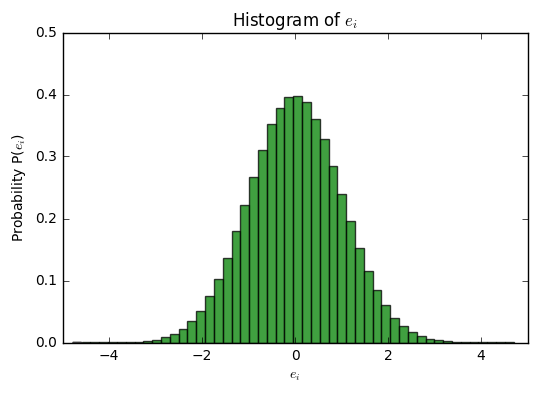

In [23]:
#Creating N(0, 1) (SOLUTION 1.3)
N = 1000000
mu = 0
sigma = 1
error = mu + sigma * numpy.random.randn(N)

# the histogram of the data
n, bins, patches = plt.hist(error, 50, normed=1, facecolor='g', alpha=0.75)

plt.xlabel(r'$e_{i}$')
plt.ylabel(r'Probability P($e_{i}$)')
plt.title('Histogram of $e_{i}$')
plt.axis([-5, 5, 0, 0.5])
plt.grid(False)
plt.show()

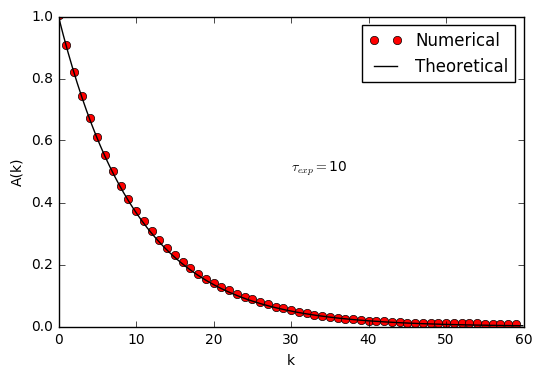

In [42]:
#Calculating autocorrelation functions (SOLUTION 1.4)
N     = 1000000
t_exp = 10
e_t10=generatingDataSets(N, t_exp)

#Calculating Autocorrelation fuctions AC[]
AC = []
for i in xrange(6*t_exp):
    AC.append(0.)
    for j in xrange(N - i):
        AC[i] = AC[i] + e_t10[j]*e_t10[j + i]
    AC[i] /= N - i

t = numpy.arange(0.0, 6*t_exp, 0.1)

plt.xlabel('k')
plt.ylabel('A(k)')
plt.text(3*t_exp, .5, r'$\tau_{exp}=$' + str(t_exp))
plt.plot(AC, 'ro',label=b'Numerical')
plt.plot(t, numpy.exp(-t/t_exp), 'k',label=b'Theoretical')
plt.axis([0, 6*t_exp, 0, 1])
plt.legend()
plt.show()

In [38]:
#Exercise 1. 5 Calculating t_int  (SOLUTION 1.5)
t_int = 0.5
for i in range(6*t_exp):
    t_int += AC[i]

print 't_int(k_max) =', t_int
print 't_int =', 0.5*(1./numpy.tanh(0.5/t_exp))*(1. - (2.*t_exp)/(2.*t_exp + 1)*numpy.exp(-6.))

t_int(k_max) = 10.8832426007
t_int = 9.98470511183


### Blocking
Exercise 2. 1 Calculate n-th block

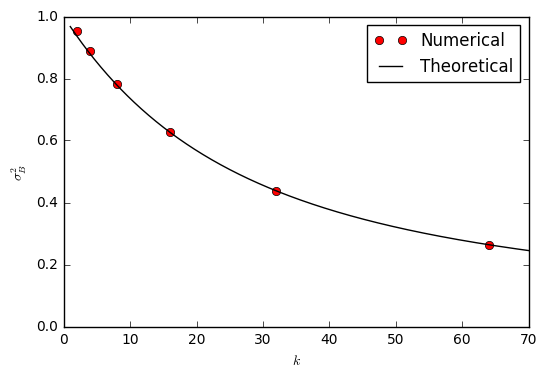

In [44]:
#Exercise 2. 1 Blocking  (SOLUTION 2.1)
N     = 1000000
t_exp = 10
e_t10 = generatingDataSets(N, t_exp)

Block_list = []
for k in range(1, 7):
    block_error = []
    b_num = 2**k #The number of bloking
    e_num = N/b_num
    for i in range(e_num):
        e_B = 0.
        for j in range(b_num):
            e_B += e_t10[i*b_num + j]
        block_error.append(e_B/b_num)
    Block_list.append(block_error)

Variance_Block = []
for k in range(1, 7):
    b_num = 2**k #The number of bloking
    e_num = N/b_num
    vb_ave = 0.
    error_ave = 0.
    for i in range(e_num):
        vb_ave += Block_list[k - 1][i]**2
        error_ave += Block_list[k - 1][i]
    vb_ave /= e_num
    vb_ave -= (error_ave/e_num)**2
    Variance_Block.append(vb_ave)

t = numpy.arange(1.0, 2**7, 0.1)

plt.plot([2,4,8,16,32,64], Variance_Block, 'ro',label=b'Numerical')
plt.plot(t, (2.*t_exp/t)*(1. - (t_exp/t)*(1. - numpy.exp(-t/t_exp))), 'k',label=b'Theoretical')
plt.axis([0, 70, 0, 1])
plt.xlabel(r'$k$')
plt.ylabel(r'$\sigma_B^2$')
plt.legend()
plt.show()